In [21]:
# We will perform an Exploratory Data Analysis on the Sample Superstore Dataset
# and try to identify the key areas for improving the profit of that super market.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
# importing the dataset

df = pd.read_csv('C:\\Users\\ROOPKATHA\\Documents\\CV prep\\EDA on retail market\\SampleSuperstore.csv')

In [24]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Analysing the dataset


In [25]:
df.shape

(9994, 13)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [27]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [28]:
# Postal Code has been stored as an integer here
# but it would be meaningless to  perform any mathematical operations on it
# we will change it's type to a string object

df['Postal Code']=df['Postal Code'].astype(str)

In [29]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code      object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [30]:
df.isnull().sum()

# no null values are there in the dataset

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [31]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [32]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [33]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [34]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [35]:
print("there are %d Sub-categories in this dataset" %df['Sub-Category'].nunique())

there are 17 Sub-categories in this dataset


In [36]:
print("there are %d states in this dataset" %df['State'].nunique())

there are 49 states in this dataset


In [37]:
print("there are %d cities in this dataset" %df['City'].nunique())

there are 531 cities in this dataset


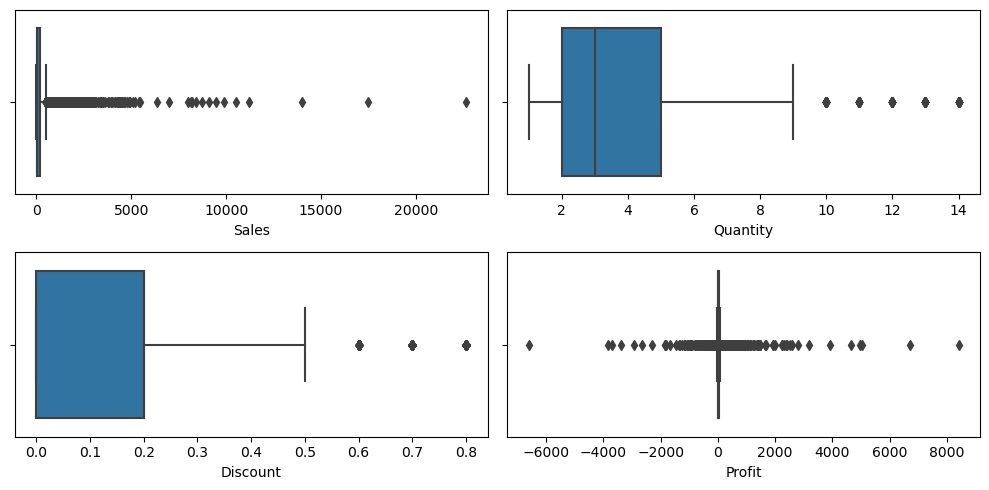

In [39]:
# checking for outliers.

fig, axs = plt.subplots(2,2, figsize = (10,5))
a = sns.boxplot(data=df,x='Sales', ax = axs[0,0])
b = sns.boxplot(data=df,x='Quantity', ax = axs[0,1])
c = sns.boxplot(data=df,x='Discount', ax = axs[1,0])
d = sns.boxplot(data=df,x='Profit', ax = axs[1,1])

plt.tight_layout()

# High number of outliers for Sales and profit

In [40]:
# checking if number of outliers in Sales and Profit are less than 5% of the entire dataset.
# If it is, then we can remove them.
# to find the outliers we have to calculate the IQR of these 2 features.

# for Sales
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_sales = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

# Calculating the percentage of Sales outliers 
percentage_of_outliers_sales = len(outliers_sales) / df.shape[0] * 100


# for Profit
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_profit = df[(df['Profit'] < lower_bound) | (df['Profit'] > upper_bound)]

# Calculating the percentage of Profit outliers 
percentage_of_outliers_profit = len(outliers_profit) / df.shape[0] * 100

print(f'Sales outliers % is {percentage_of_outliers_sales:.2f}%')
print(f'Profit outliers % - {percentage_of_outliers_profit:.2f}%')

# since for both features outliers are more than 5% of the dataset, these cannot be removed.

Sales outliers % is 11.68%
Profit outliers % - 18.82%


Performing the EDA

State Wise Sales and Profit

In [24]:
sales=df['Sales'].sum()
profit=df['Profit'].sum()

print('total sales in the US', round(sales,2))
print('total profit in the US', round(profit,2))

total sales in the US 2297200.86
total profit in the US 286397.02


In [25]:
# top 10 states by sales and profit

top_state_sales = df.groupby("State")["Sales"].sum().nlargest(n=10)

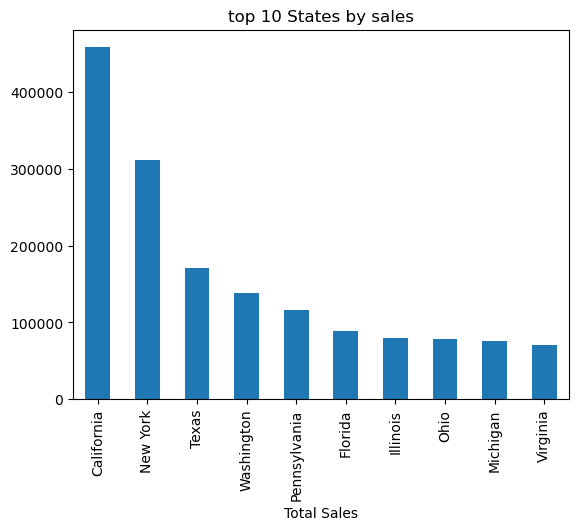

In [43]:
top_state_sales.plot(kind='bar')
plt.xlabel('States')
plt.xlabel('Total Sales')
plt.title('top 10 States by sales')
plt.show()

In [78]:
bottom_state_sales = df.groupby("State")["Sales"].sum().nsmallest(5)
bottom_state_sales.index

Index(['North Dakota', 'West Virginia', 'Maine', 'South Dakota', 'Wyoming'], dtype='object', name='State')

California makes the highest sales followed by New York
and Wyoming has the lowest sales in the US.

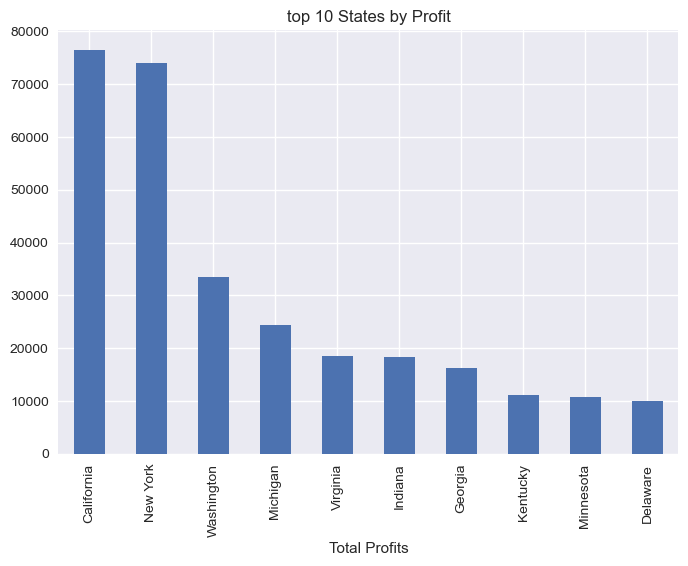

In [80]:
top_state_profit = df.groupby("State")["Profit"].sum().nlargest(n=10)

top_state_profit.plot(kind='bar')
plt.xlabel('States')
plt.xlabel('Total Profits')
plt.title('top 10 States by Profit')
plt.show()

In [84]:
bottom_state_profit = df.groupby("State")["Profit"].sum().nsmallest(5)
bottom_state_profit.index

Index(['Texas', 'Ohio', 'Pennsylvania', 'Illinois', 'North Carolina'], dtype='object', name='State')

California makes the highest profit followed by New York and North Carolina makes the lowest profit in the US.

Region Wise Sales and Profit

In [89]:
# Region wise sales

region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales=region_sales.reset_index()
region_sales

,Region,Sales
0,West,725457.8245
1,East,678781.2400
2,Central,501239.8908
3,South,391721.9050


Text(0.5, 1.0, 'Sales by Region')

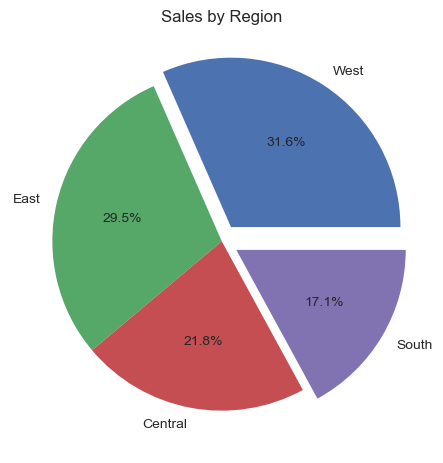

In [95]:
# to see the sales distribution, we will draw a pie chart

plt.pie(region_sales['Sales'], labels=region_sales['Region'], autopct='%.1f%%', explode=(0.1,0,0,0.1))
plt.title("Sales by Region")

In [96]:
# region wise profit

region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
region_profit=region_profit.reset_index()
region_profit

,Region,Profit
0,West,108418.4489
1,East,91522.7800
2,South,46749.4303
3,Central,39706.3625


Text(0.5, 1.0, 'Profit by Region')

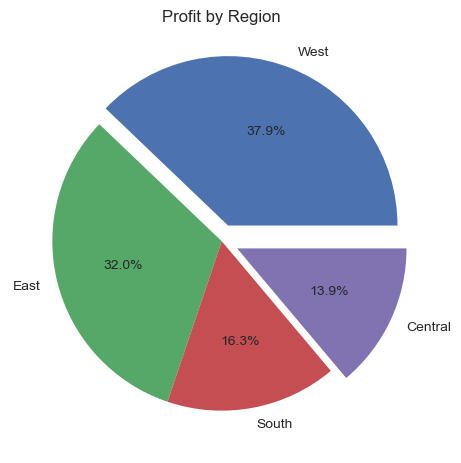

In [97]:
# to see the profit distribution, we will draw a pie chart

plt.pie(region_profit['Profit'], labels=region_profit['Region'], autopct='%.1f%%', explode=(0.1,0,0,0.1))
plt.title("Profit by Region")

It can be seen that that the West region has the both the highest sales and profit.
but although Central region makes more sales that South, it earns the lowest profit.

City Wise Sales and Profit

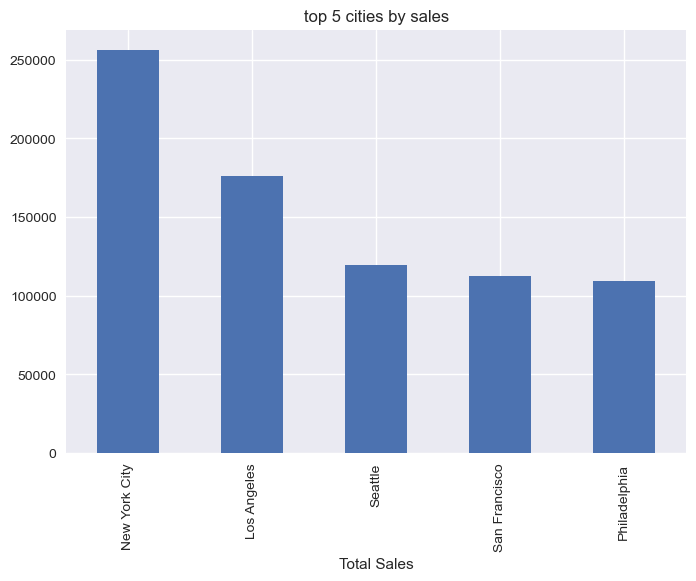

In [104]:
# City wise sales

top_city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).nlargest(5)

top_city_sales.plot(kind='bar')
plt.xlabel('CIty')
plt.xlabel('Total Sales')
plt.title('top 5 cities by sales')
plt.show()

In [103]:
bottom_city_sales = df.groupby("City")["Sales"].sum().nsmallest(5)
bottom_city_sales.index

Index(['Abilene', 'Elyria', 'Jupiter', 'Pensacola', 'Ormond Beach'], dtype='object', name='City')

New York City earns the highest Sales followed by Los Angeles and Ormond Beach has the lowest sales among the cities.

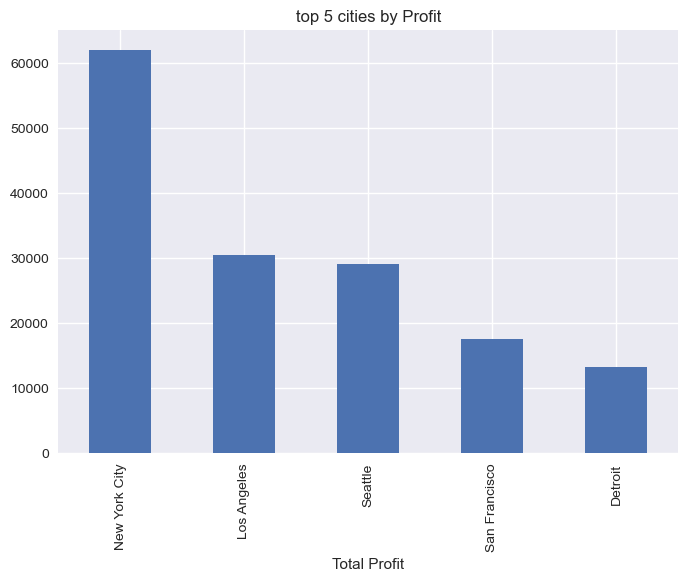

In [105]:
# City wise Profit

top_city_profit = df.groupby('City')['Profit'].sum().sort_values(ascending=False).nlargest(5)

top_city_profit.plot(kind='bar')
plt.xlabel('City')
plt.xlabel('Total Profit')
plt.title('top 5 cities by Profit')
plt.show()

In [106]:
bottom_city_profit = df.groupby("City")["Profit"].sum().nsmallest(5)
bottom_city_profit.index

Index(['Philadelphia', 'Houston', 'San Antonio', 'Lancaster', 'Chicago'], dtype='object', name='City')

New York City earns the highest profit followed by Los Angeles and Chicago makes the lowest profit among the cities.

Segment wise sales and profit

Text(0.5, 1.0, 'Sales by Segment')

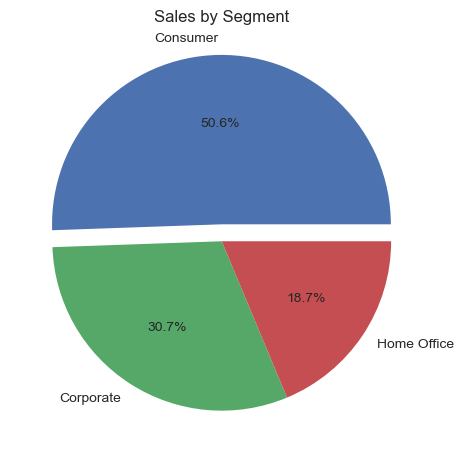

In [110]:
# segment wise Sales

segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
segment_sales=segment_sales.reset_index()

# to see the sales distribution, we will draw a pie chart

plt.pie(segment_sales['Sales'], labels=segment_sales['Segment'], autopct='%.1f%%', explode=(0.1,0,0))
plt.title("Sales by Segment")

The consumer segment makes the highest sales followed by corporate and Home office

Text(0.5, 1.0, 'Profit by Segment')

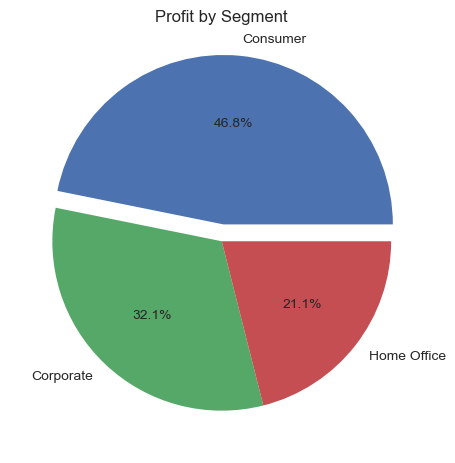

In [111]:
# segment wise profit

segment_profit = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
segment_profit=segment_profit.reset_index()

# to see the sales distribution, we will draw a pie chart

plt.pie(segment_profit['Profit'], labels=segment_profit['Segment'], autopct='%.1f%%', explode=(0.1,0,0))
plt.title("Profit by Segment")

The consumer segment makes the highest sales followed by corporate and Home office

Home office lacks both in terms of Sales and Profit. Must be looked into the products this Segment is selling.

Product Category wise Sales and Profit

Text(0.5, 1.0, 'Sales by Category')

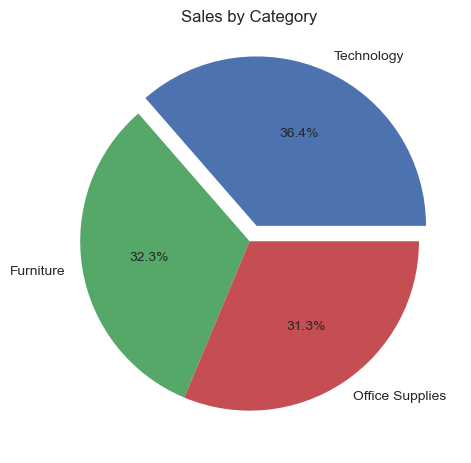

In [112]:
# Category wise Sales

category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales=category_sales.reset_index()

# to see the sales distribution, we will draw a pie chart

plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%.1f%%', explode=(0.1,0,0))
plt.title("Sales by Category")

Text(0.5, 1.0, 'Profit by Category')

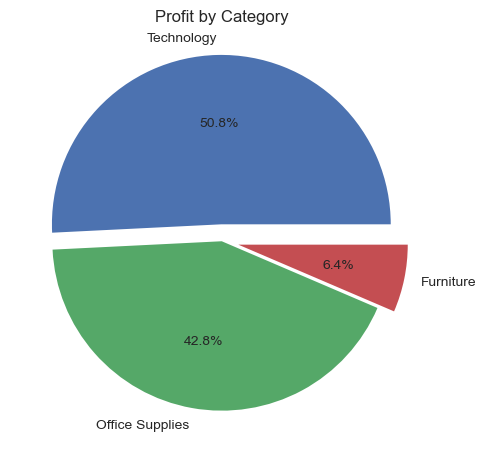

In [114]:
# Category wise Profit

category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
category_profit=category_profit.reset_index()

# to see the sales distribution, we will draw a pie chart

plt.pie(category_profit['Profit'], labels=category_profit['Category'], autopct='%.1f%%', explode=(0.1,0,0.1))
plt.title("Profit by Category")

This is quite interesting!!
Although Furniture makes slightly more sales than office supplies, when it comes to profit, office supplies makes almost 6.5 times more profit than furniture.

Product Sub-Category wise Sales and Profit

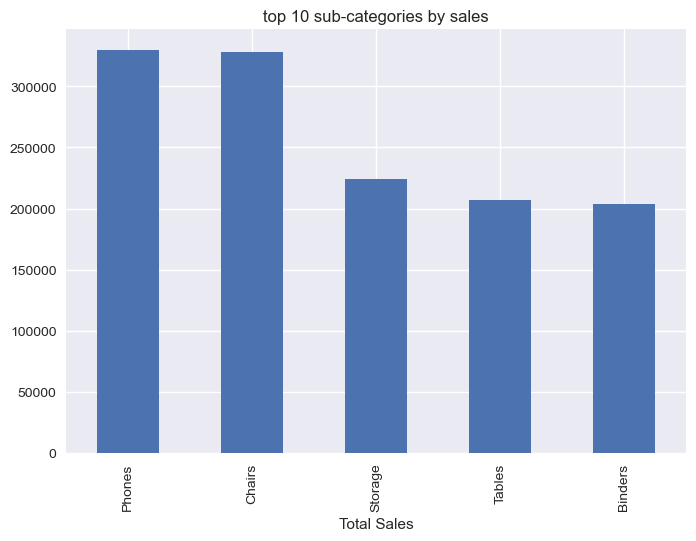

In [121]:
# sub-category wise sales
top_sc_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).nlargest(5)

top_sc_sales.plot(kind='bar')
plt.xlabel('Sub-category')
plt.xlabel('Total Sales')
plt.title('top 10 sub-categories by sales')
plt.show()

In [116]:
bottom_sc_sales = df.groupby("Sub-Category")["Sales"].sum().nsmallest(5)
bottom_sc_sales.index

Index(['Fasteners', 'Labels', 'Envelopes', 'Art', 'Supplies'], dtype='object', name='Sub-Category')

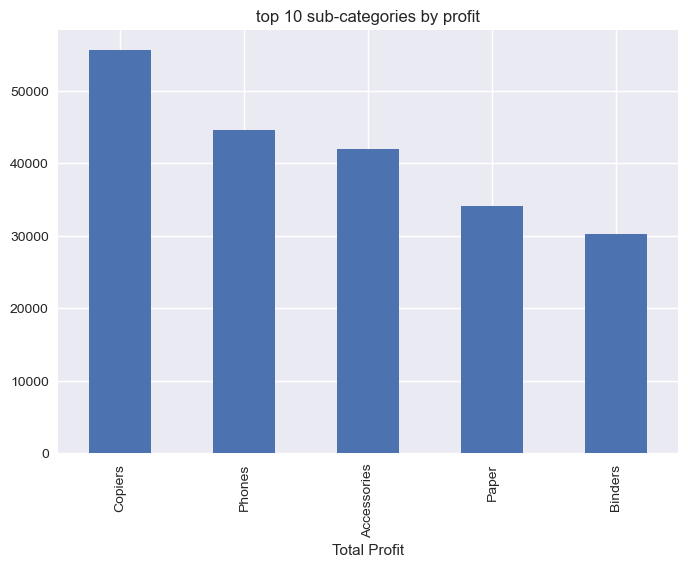

In [122]:
# sub-category wise profit
top_sc_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).nlargest(5)

top_sc_profit.plot(kind='bar')
plt.xlabel('Sub-category')
plt.xlabel('Total Profit')
plt.title('top 10 sub-categories by profit')
plt.show()

In [120]:
bottom_sc_profit = df.groupby("Sub-Category")["Profit"].sum().nsmallest(5)
bottom_sc_profit.index

Index(['Tables', 'Bookcases', 'Supplies', 'Fasteners', 'Machines'], dtype='object', name='Sub-Category')

We can see that Tables is one of the top 5 most selling sub-categories but it comes under the 5 lowest profitable sub-categories. Must be looked into this.

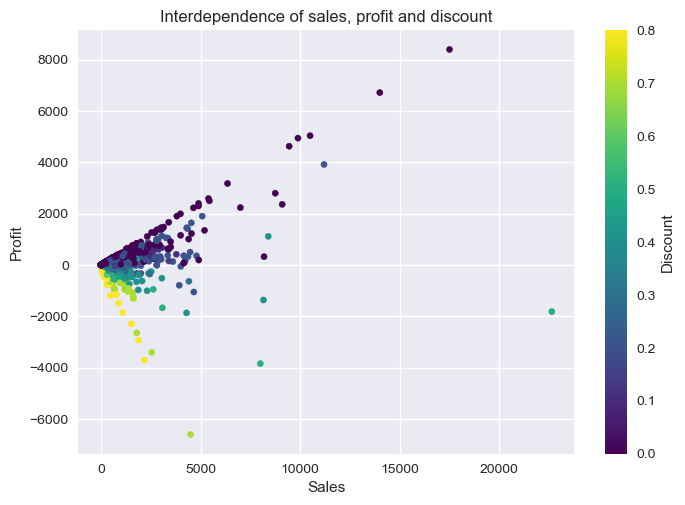

In [126]:
# Now we want to see the relation between sales and profit 
# we are going to put the discount as colour to know how the relation between sales and profit changes with the discount rate.

df.plot(kind = 'scatter', x = 'Sales', y='Profit', c = 'Discount',colormap='viridis')
plt.title('Interdependence of sales, profit and discount')
plt.show()


We can see that when the discount rate is low (close to 0-->dark purple) with the increase in sales, profit goes up as well.
But when discount is high (yellow), when sales increases, the profits tends to fall.

Now we will do a relational analysis among the 4 numeric features
namely - sales, quantity, discount and profit.

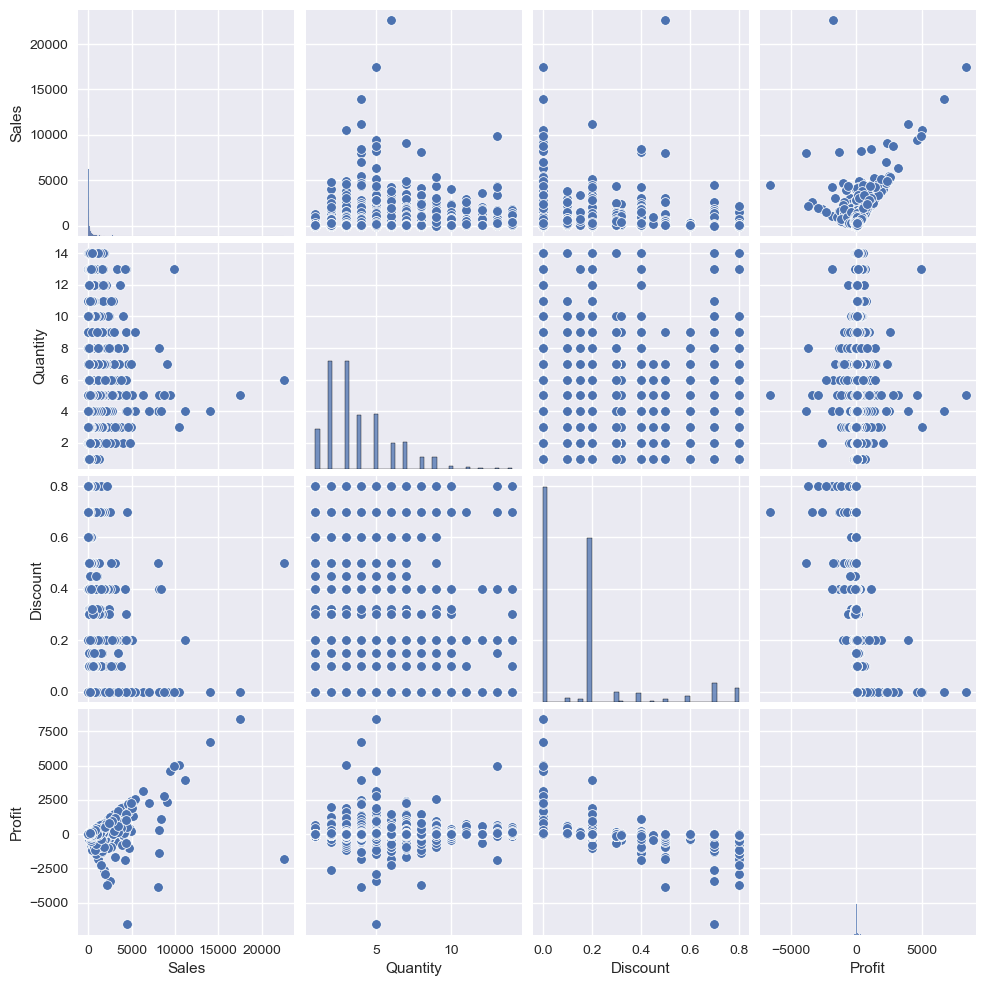

In [127]:
numeric = df.loc[:,['Sales','Quantity','Discount','Profit']]
sns.pairplot(numeric)

The relations are not very clear from this pairplot. We will therefore plot a heat map to get a clearer idea about the relations.

In [128]:
correl = numeric.corr()
correl

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


<Axes: >

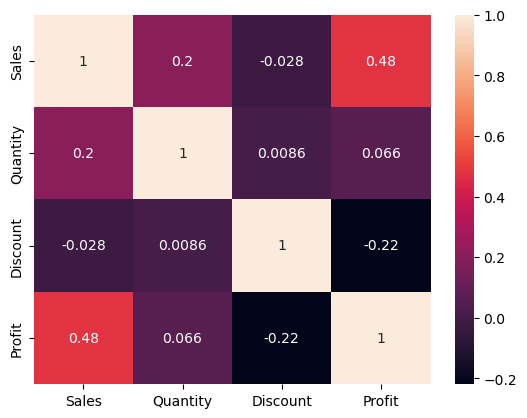

In [52]:
sns.heatmap(correl, annot = True)

We can see there is a positive correlation between sales and profit (.48)
And a moderate negative correlation between profit and discount.

we will further explore these cases.

In [53]:
# let's consider the case when discount = 0.

df1 = df[df['Discount']==0]
numeric1 = df1.loc[:,['Sales','Quantity','Discount','Profit']]
correl1 = numeric1.corr()

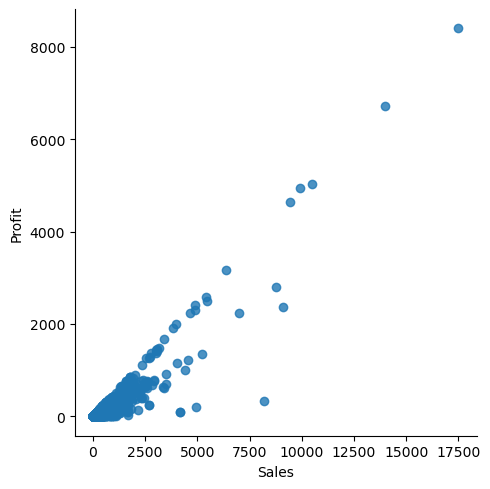

In [55]:
sns.lmplot(data = df1,x = 'Sales', y='Profit',fit_reg=False)

<Axes: >

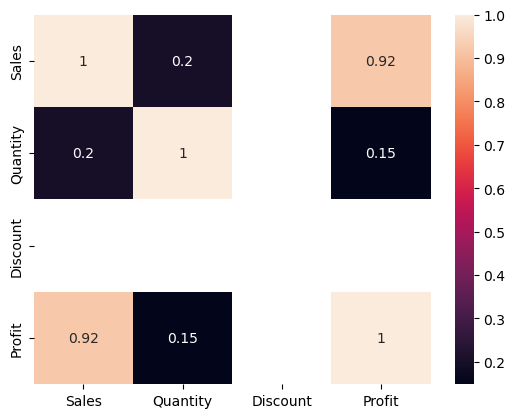

In [56]:
sns.heatmap(correl1, annot = True)

When the discount is 0 there is a very strong positive correlation between sales and profit (0.92)

We can also check which of the categories are contributing the most for higher profits.

Under the category technology, we can see there are some products which earns very high profits.

In [59]:
# Now let's consider the case when discount != 0.

df2 = df[df['Discount']!=0]
numeric2 = df2.loc[:,['Sales','Quantity','Discount','Profit']]
correl2 = numeric2.corr()

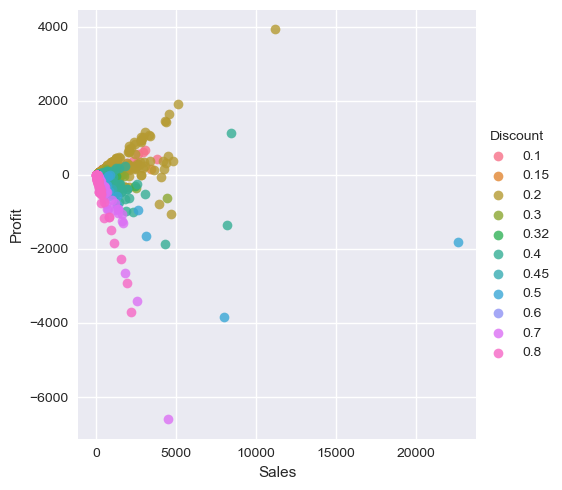

In [61]:
sns.lmplot(data = df2,x = 'Sales', y='Profit',hue = 'Discount',fit_reg=False)

Again we can see that the higher the discount, with increase in sales the lower is the profit.

<Axes: >

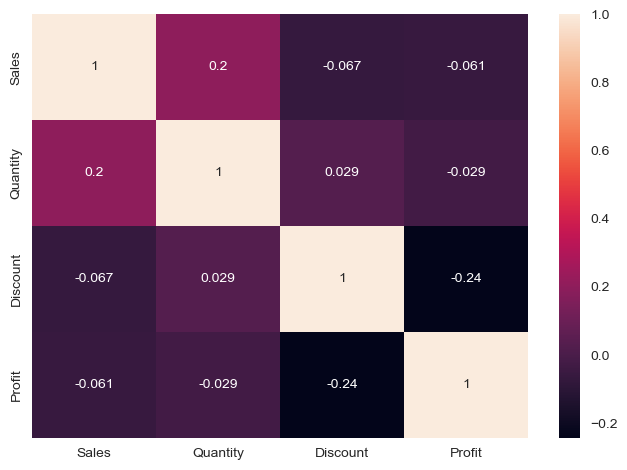

In [64]:
sns.heatmap(correl2, annot = True)

When discount is positive, there is a negative correlation between discount and profit. 

In this case also, there are some products under the technology category that gives very high negative profit.

Now from the earlier analysis we saw that Central region (highest Geographical entity in this case) was earning the lowest profit. Now we will try to go deeper from there and find out in that central region which is the lowest  profit making category, within that category thich is the lowest profit making sub-category. Finally our target is to locate the 5 lowest  profit making cities in the central region and try to see wether the discount rate is high in those cities or not (since there is a negative correlation between profit and discount rate).

In [130]:
df_central = df[df['Region']=='Central']
df_central.shape

(2323, 13)

In [138]:
# finding out the lowest profit Category in the central region

df_central.groupby('Category')['Profit'].sum().sort_values(ascending=False)

Category
Technology         33697.4320
Office Supplies     8879.9799
Furniture          -2871.0494
Name: Profit, dtype: float64

In [141]:
# Furniture is the lowest profit earning category
# now from df_central we will create another DataFrame with the Furniture Product category only

df_central1=df_central[df_central['Category']=='Furniture']
df_central1.shape

(481, 13)

In [143]:
# finding out the lowest profit Sub-Category in the central region for the product category Furniture

df_central1.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=True)

Sub-Category
Furnishings   -3906.2168
Tables        -3559.6504
Bookcases     -1997.9043
Chairs         6592.7221
Name: Profit, dtype: float64

In [162]:
# both Furnishings and Tables are making quite high negative profit.
# Now we will see the lowest profit making cities for each of these sub-categories in the central region.

df_central2=df_central[df_central['Sub-Category']=='Furnishings']
df_central2.shape

(205, 13)

In [176]:
# Now for The furnishing sub-category, we will check the lowest 5 profit making cities along with their average profit.

a=df_central2.groupby('City')['Profit'].sum()
b=df_central2.groupby('City')['Sales'].mean()
c=df_central2.groupby('City')['Discount'].mean()

df3= pd.concat([a, b,c], axis=1)
df3.columns=['Total Profit','Total Sales','Average Discount']

df3.sort_values(by='Total Profit').head()

,Total Profit,Total Sales,Average Discount
City,,,
Chicago,-1130.5897,38.612686,0.6
Dallas,-751.2971,66.118154,0.6
Houston,-704.8210,28.255529,0.6
Aurora,-486.1600,116.034000,0.6
Round Rock,-427.4500,341.960000,0.6


all these states have very high discount rate (60% on average).
One must really look into the matter and try to reduce the discount rate along with trying to increase the sales.

In [177]:
df_central3=df_central[df_central['Sub-Category']=='Tables']
df_central3.shape

(72, 13)

In [178]:
# Now for The Tables sub-category, we will check the lowest 5 profit making cities along with their average profit.

a=df_central3.groupby('City')['Profit'].sum()
b=df_central3.groupby('City')['Sales'].mean()
c=df_central3.groupby('City')['Discount'].mean()

df4= pd.concat([a, b,c], axis=1)
df4.columns=['Total Profit','Total Sales','Average Discount']

df4.sort_values(by='Total Profit').head()

,Total Profit,Total Sales,Average Discount
City,,,
Chicago,-1446.9305,275.501875,0.5
Aurora,-1255.8546,370.766000,0.5
Houston,-625.0306,427.330556,0.3
Rockford,-538.4460,626.100000,0.5
Dallas,-417.5043,354.085000,0.3


similarly, here also, we can see discount is quite high.
Chicago, Aurora, Houston, Rockford, Dallas, Round Rock are the 6 cities that needs immediate attention to find out the root cause of this high discount rate along with low sales figures.
